In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# I- Importing the data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.shape

(918, 12)

# II- Preprocessiong

## 1) Checking for NAN values 

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 2) Checking for Null values

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 3) Check the categorical values

### a) Uniqueness of the data

In [7]:
##For the Sex
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [9]:
##For ChestPainType
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [10]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [11]:
##For RestingECG
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [12]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [13]:
##For ExerciseAngina
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [15]:
##For ST_Slope
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [16]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

### b) Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [18]:
df_encoded = df.copy()

In [19]:
##Use LabelEncoder for columns with 2 or 3 categorical values
le = LabelEncoder()
df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])
df_encoded['ExerciseAngina'] = le.fit_transform(df_encoded['ExerciseAngina'])
df_encoded['RestingECG'] = le.fit_transform(df_encoded['RestingECG'])
df_encoded['ST_Slope'] = le.fit_transform(df_encoded['ST_Slope'])
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,1,172,0,0.0,2,0
1,49,0,NAP,160,180,0,1,156,0,1.0,1,1
2,37,1,ATA,130,283,0,2,98,0,0.0,2,0
3,48,0,ASY,138,214,0,1,108,1,1.5,1,1
4,54,1,NAP,150,195,0,1,122,0,0.0,2,0


In [20]:
##Use OneHotEncoder fro other columns
df_encoded = pd.get_dummies(df_encoded, columns=["ChestPainType"])

In [21]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,1,1,0,0,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,2,0,0,0,1,0


In [22]:
##Put the HeartDisease column last
df_hd = df_encoded['HeartDisease']
df_hd = df_hd.to_list()

In [23]:
df_encoded.pop('HeartDisease')
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,0.0,2,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,1,0,0,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,1,1,0,0,0
4,54,1,150,195,0,1,122,0,0.0,2,0,0,1,0


In [24]:
df_encoded.insert(14,'HeartDisease',df_hd)

In [25]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,HeartDisease
0,40,1,140,289,0,1,172,0,0.0,2,0,1,0,0,0
1,49,0,160,180,0,1,156,0,1.0,1,0,0,1,0,1
2,37,1,130,283,0,2,98,0,0.0,2,0,1,0,0,0
3,48,0,138,214,0,1,108,1,1.5,1,1,0,0,0,1
4,54,1,150,195,0,1,122,0,0.0,2,0,0,1,0,0


# III- Data visualisation

## 1) With categorical data

In [26]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


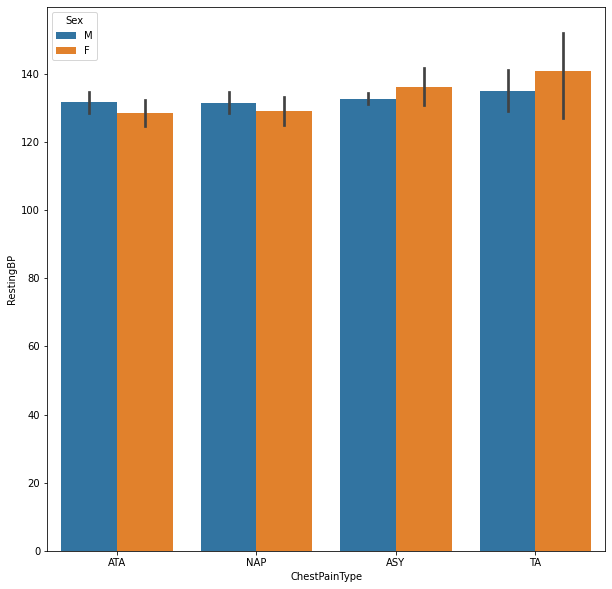

In [44]:
##Relation between Sex RestingBP and ChestPainType
fig, axe = plt.subplots(figsize=(10,10))
ax1 = sns.barplot(hue="Sex",x="ChestPainType",y="RestingBP", data=df, ax=axe)

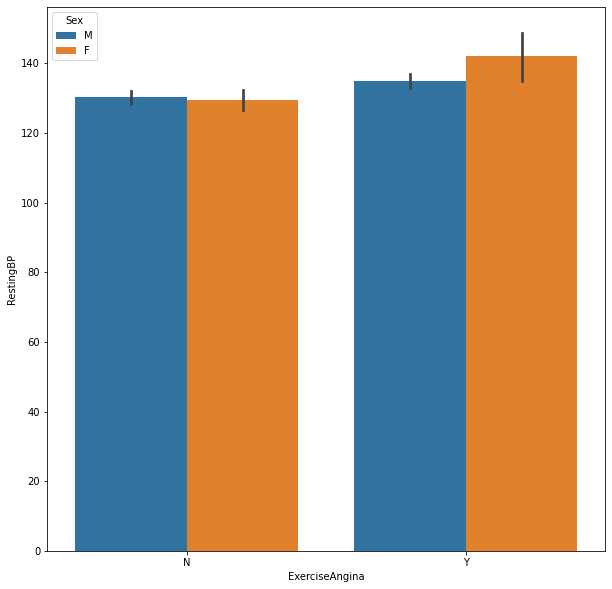

In [28]:
##Relation between Sex RestingBP and ExerciseAngina
plt.figure(figsize=(10,10))
ax2 = sns.barplot(hue="Sex",x="ExerciseAngina",y="RestingBP", data=df)

## 2)  With numeracle values

<Figure size 1440x1440 with 0 Axes>

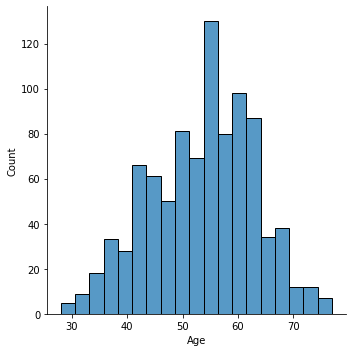

In [36]:
##Age
plt.figure(figsize=(20,20))
sns.displot(x="Age",data=df)

<Figure size 1440x1440 with 0 Axes>

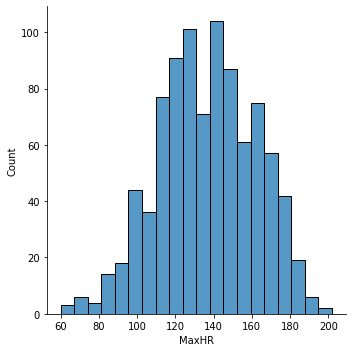

In [40]:
##MaxHR
plt.figure(figsize=(20,20))
sns.displot(x="MaxHR",data=df)

<Figure size 1440x1440 with 0 Axes>

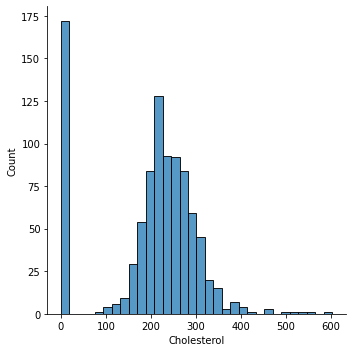

In [38]:
##Cholesterol
plt.figure(figsize=(20,20))
sns.displot(x="Cholesterol",data=df)

<Figure size 2160x2160 with 0 Axes>

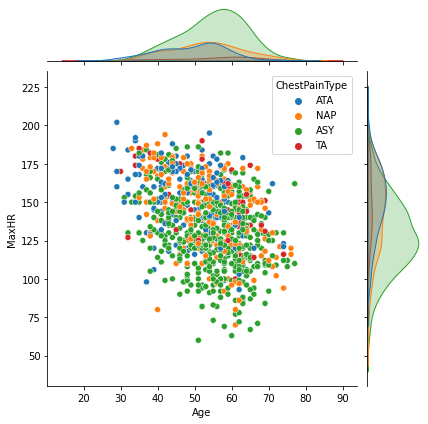

In [54]:
##Age MaxHR ChestPainType
plt.figure(figsize=(30,30))
sns.jointplot(data=df, x="Age", y="MaxHR", hue="ChestPainType")

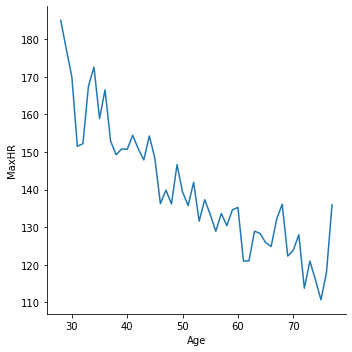

In [62]:
##Age MaxHR
sns.relplot(x="Age", y="MaxHR", ci=None, kind="line", data=df);

## 3) Heatmap corrolation

<AxesSubplot:>

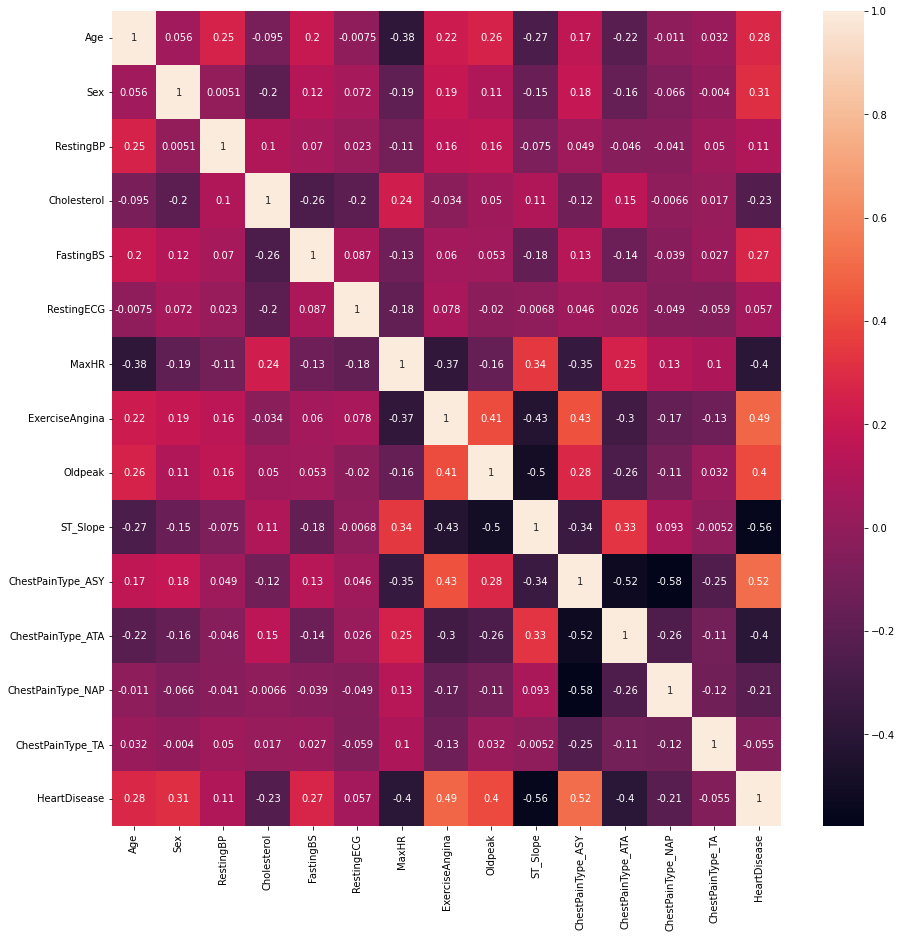

In [75]:
_, axe = plt.subplots(figsize=(15,15))
sns.heatmap(df_encoded.corr(),annot=True,ax=axe)

# IV- Classification

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, mean_squared_error, confusion_matrix, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 1) Splitting / Scaling the data

In [78]:
X = df_encoded.iloc[:,:-1]
Y = df_encoded.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

In [81]:
scaler = MinMaxScaler()
X_trainer_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

## 2) Training and test the models (finding the best K)

Text(0, 0.5, 'Error')

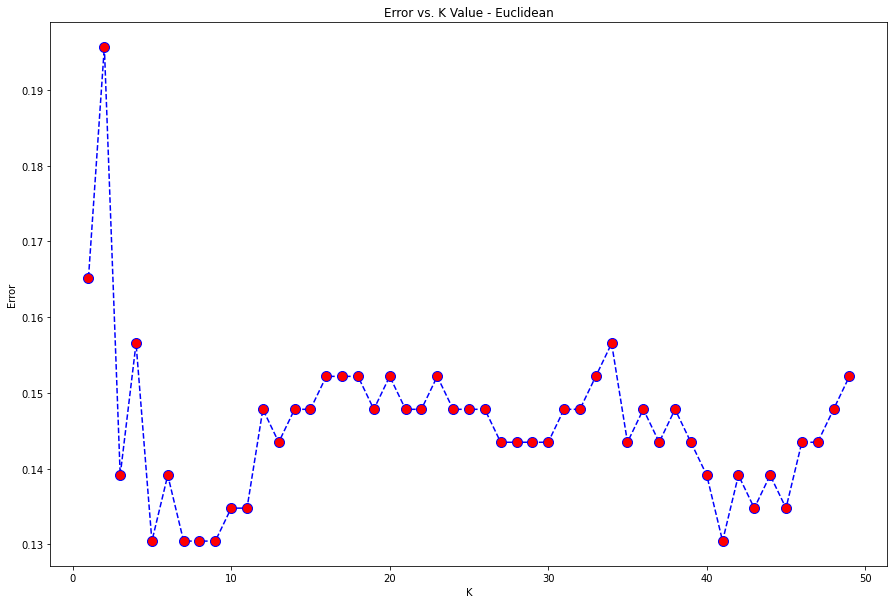

In [83]:
##Working with euclidean metric
## k between 1 and 50
error_euc = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_trainer_scale, Y_train)
    pred_i = knn.predict(X_test_scale)
    error_euc.append(mean_squared_error(Y_test,pred_i))
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_euc,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value - Euclidean')
plt.xlabel('K')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

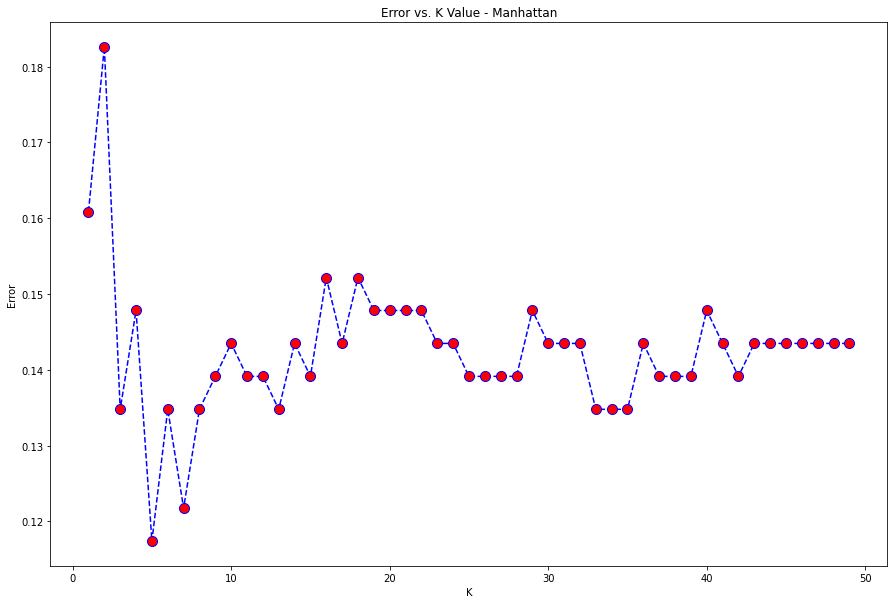

In [85]:
##Working with manhattan metric
## k between 1 and 50
error_man = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn.fit(X_trainer_scale, Y_train)
    pred_i = knn.predict(X_test_scale)
    error_man.append(mean_squared_error(Y_test,pred_i))
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_man,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value - Manhattan')
plt.xlabel('K')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

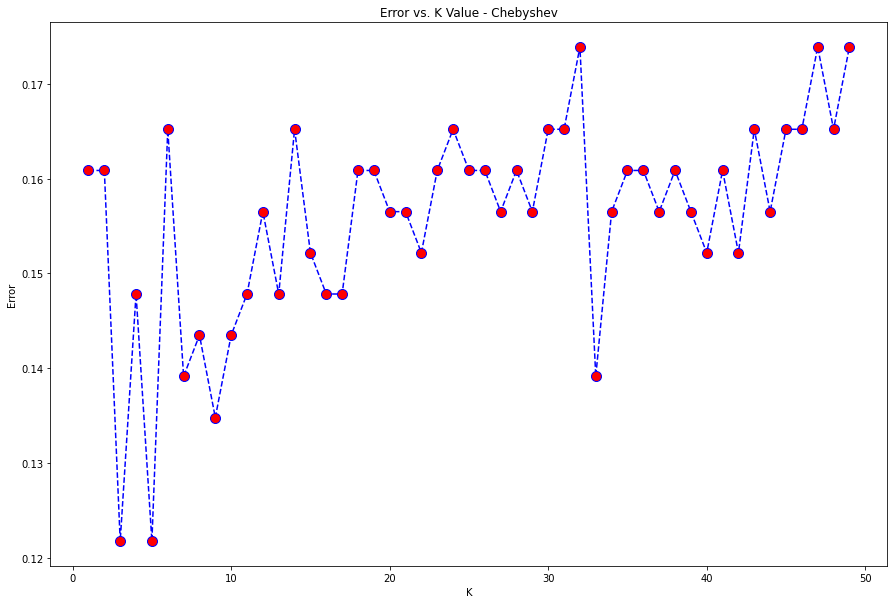

In [86]:
##Working with manhattan chebyshev
## k between 1 and 50
error_che = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i, metric="chebyshev")
    knn.fit(X_trainer_scale, Y_train)
    pred_i = knn.predict(X_test_scale)
    error_che.append(mean_squared_error(Y_test,pred_i))
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_che,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value - Chebyshev')
plt.xlabel('K')
plt.ylabel('Error')

In [87]:
print("--- Euclidean ---")
print("Minimum error : ",min(error_euc)," / K = ",error_euc.index(min(error_euc)) + 1)
print("--- Manhattan ---")
print("Minimum error : ",min(error_man)," / K = ",error_man.index(min(error_man)) + 1)
print("--- Chebyshev ---")
print("Minimum error : ",min(error_che)," / K = ",error_che.index(min(error_che)) + 1)

--- Euclidean ---
Minimum error :  0.13043478260869565  / K =  5
--- Manhattan ---
Minimum error :  0.11739130434782609  / K =  5
--- Chebyshev ---
Minimum error :  0.12173913043478261  / K =  3


In [88]:
knn = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn.fit(X_trainer_scale, Y_train)
predict = knn.predict(X_test_scale)

## 3) Accuracy scores

In [89]:
print("--- Accuracy ---")
print("accuracy = ",accuracy_score(Y_test,predict))
print("--- F1 score ---")
print("F1 score = ",f1_score(Y_test,predict))
print("--- Confusion Matrix ---")
print(confusion_matrix(Y_test,predict))

--- Accuracy ---
accuracy =  0.8826086956521739
--- F1 score ---
F1 score =  0.9025270758122743
--- Confusion Matrix ---
[[ 78  11]
 [ 16 125]]


## 4) ROAUC 

In [91]:
fpr, tpr, thresholds = roc_curve(Y_test, predict)

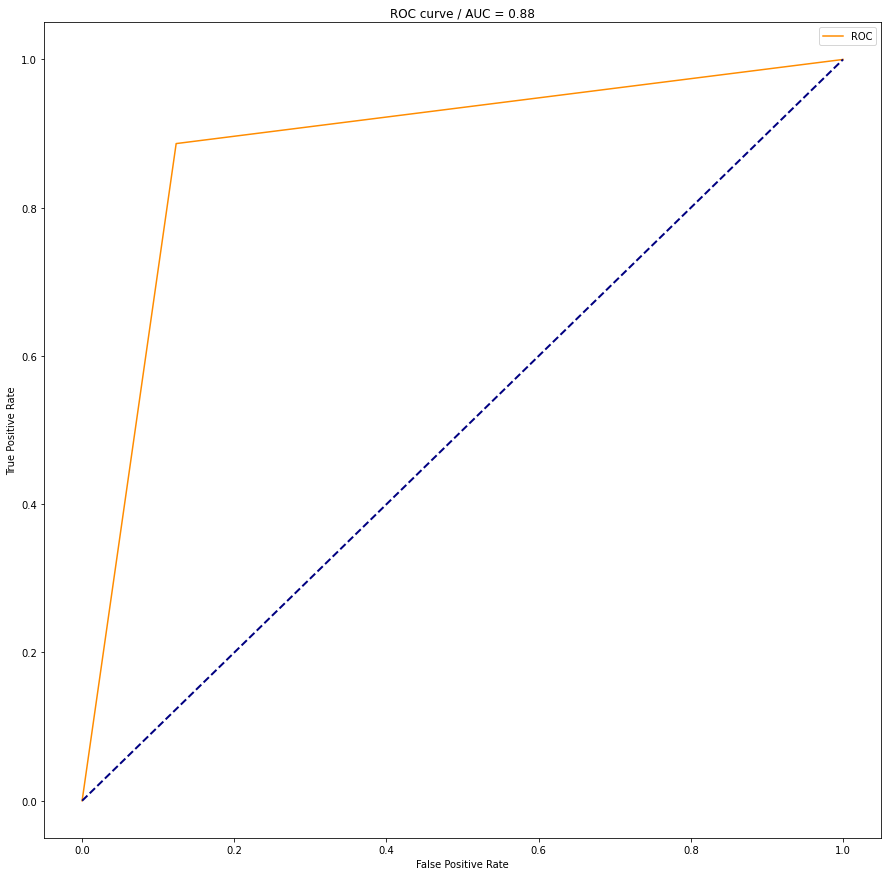

In [93]:
plt.figure(figsize=(15,15))
plt.plot(fpr,tpr,color="darkorange", label="ROC")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(label=("ROC curve / AUC = "+str(round(auc(fpr,tpr), 2))))
plt.legend()
plt.show()